In [8]:
from eclipsoid.light_curve import limb_dark_oblate_lightcurve
from jaxoplanet.light_curves import limb_dark_light_curve
from eclipsoid.ellipsoid import EclipsoidSystem
from jaxoplanet.orbits import TransitOrbit
import jax
import jax.numpy as jnp

In [2]:
params = {
    'period':300.456,
    'radius':0.1,
    'u':jnp.array([0.3,0.2, 0.1, 0.1]),
    'f':0.,
    'bo':0.8,
    'duration':0.4,
    'theta':0.
}

orbit = TransitOrbit(
    period=params['period'], time_transit=0., duration=params['duration'], impact_param=params['bo'], radius_ratio=params['radius']
)

t = jnp.linspace(-0.5, 0.5, 100)
lc = limb_dark_light_curve(orbit, params['u'])(t)

oblate_lc = limb_dark_oblate_lightcurve(orbit, params['u'], params['f'], params['theta'])(t)

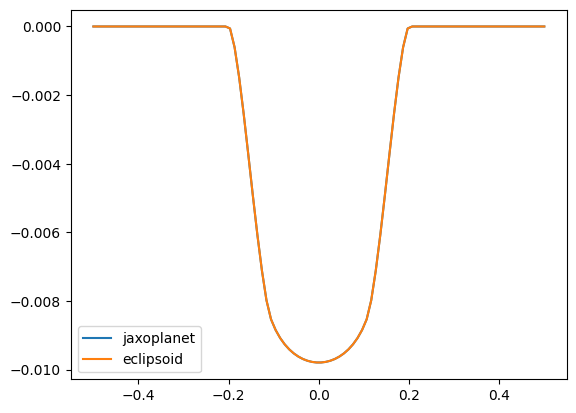

In [4]:
import matplotlib.pyplot as plt
plt.plot(t, lc, color="C0", label='jaxoplanet')
plt.plot(t, oblate_lc-1., color="C1", label='eclipsoid')
#plt.plot(t, legacy_oblate_lc-1., color="C2", label='jax0planet')
plt.legend()

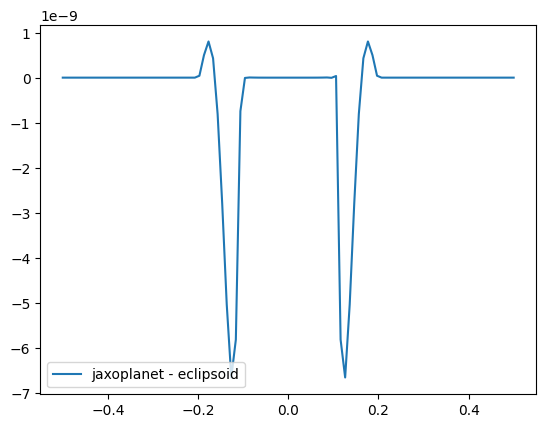

In [5]:
plt.plot(t, lc-(oblate_lc-1.), label='jaxoplanet - eclipsoid')
plt.legend()

In [ ]:
from jaxoplanet.orbits.keplerian import Central
central = Central(radius=1.0, mass=0.8)
oblate_system = EclipsoidSystem(central).add_body(
    radius=0.1, mass=0.1, period=300.456, oblateness=0.0
)

TypeError: EllipsoidalBody.__init__() got an unexpected keyword argument 'theta'

In [ ]:
jit_lc = jax.jit(limb_dark_light_curve(orbit, params['u']))
circ_lc = jit_lc(t)

In [ ]:
oblate_lc_jit = jax.jit(oblate_lightcurve_numerical(orbit=oblate_system, u=params['u']))
oblate_lc_fast_jit = jax.jit(oblate_lightcurve(orbit=oblate_system, u=params['u']))

oblate_lc_system = oblate_lc_jit(time=t)

In [ ]:
%%timeit
circ_lc = jit_lc(t).block_until_ready()

In [ ]:
%%timeit
oblate_lc_system = oblate_lc_jit(time=t).block_until_ready()

In [ ]:
%%timeit
oblate_lc_system = oblate_lc_fast_jit(time=t).block_until_ready()

In [ ]:
plt.plot(t, oblate_lc_system, color="C2", label='jax0planet system')

## Testing out exposure time integration:

In [ ]:
from jaxoplanet.light_curves.transforms import integrate
from jaxoplanet.units import unit_registry as ureg
lc_integrated = integrate(oblate_lightcurve(orbit=oblate_orbit, u=params['u']), exposure_time=0.5*ureg.hour)

In [ ]:
oblate_lc_integrated = lc_integrated(time=t)
plt.plot(t, oblate_lc)
plt.plot(t, oblate_lc_integrated, color="C3", label='jax0planet integrated')